### Deep learning (ANN) model
Using the Churn Modelling dataset, I would like to create an ANN model.


In [8]:
#loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
# reading the dataframe
df = pd.read_csv("Churn_Modelling_cleaned.csv", header=0)
print(df.head())

  Geography  Gender  NumOfProducts  HasCrCard  IsActiveMember  Exited  \
0    France  Female              1          1               1       1   
1     Spain  Female              1          0               1       0   
2    France  Female              3          1               0       1   
3    France  Female              2          0               0       0   
4     Spain  Female              1          1               1       0   

   CreditScore       Age    Tenure   Balance  EstimatedSalary  
0    -0.326221  0.293517 -1.041760 -1.225848         0.021886  
1    -0.440036  0.198164 -1.387538  0.117350         0.216534  
2    -1.536794  0.293517  1.032908  1.333053         0.240687  
3     0.501521  0.007457 -1.387538 -1.225848        -0.108918  
4     2.063884  0.388871 -1.041760  0.785728        -0.365276  


In [10]:
# one hot encoding
encoding_cols = ["Gender", "Geography"]
encoded_df = pd.get_dummies(df, columns=encoding_cols, drop_first=True)
print(encoded_df.head())

   NumOfProducts  HasCrCard  IsActiveMember  Exited  CreditScore       Age  \
0              1          1               1       1    -0.326221  0.293517   
1              1          0               1       0    -0.440036  0.198164   
2              3          1               0       1    -1.536794  0.293517   
3              2          0               0       0     0.501521  0.007457   
4              1          1               1       0     2.063884  0.388871   

     Tenure   Balance  EstimatedSalary  Gender_Male  Geography_Germany  \
0 -1.041760 -1.225848         0.021886            0                  0   
1 -1.387538  0.117350         0.216534            0                  0   
2  1.032908  1.333053         0.240687            0                  0   
3 -1.387538 -1.225848        -0.108918            0                  0   
4 -1.041760  0.785728        -0.365276            0                  0   

   Geography_Spain  
0                0  
1                1  
2                0  
3 

The dataset is ready for building model

In [11]:
# train test split
# as we expect class imbalance (exited_0 = 79.6%), stratified sampling is used
# based on y (the output variable)
from sklearn.model_selection import train_test_split
X = encoded_df.drop("Exited", axis=1)
y = encoded_df["Exited"]
xtrain,xtest, ytrain, ytest = train_test_split(X,y, test_size=0.25,random_state=1987, stratify=y)
print(xtrain.shape, xtest.shape)

(7500, 11) (2500, 11)


In [12]:
print(xtrain)

      NumOfProducts  HasCrCard  IsActiveMember  CreditScore       Age  \
5280              1          1               0    -0.843560 -1.041433   
4568              1          1               1    -0.688359 -0.660018   
6710              2          1               0    -0.750439  0.007457   
5934              1          0               0     1.184408 -0.469311   
7370              2          1               1     0.046263 -0.183251   
...             ...        ...             ...          ...       ...   
3596              1          0               0    -0.077899 -0.278604   
2327              1          1               1    -0.067552 -0.850726   
9943              1          1               1     1.380997 -1.518201   
2798              1          1               0    -0.740092 -1.041433   
8685              2          1               1     1.256835  0.388871   

        Tenure   Balance  EstimatedSalary  Gender_Male  Geography_Germany  \
5280 -0.695982  0.377384        -1.650756     

In [13]:
# loading the performance metrics dataset to record model performance
performance_df = pd.read_csv("classification_metrics.csv", header=0)
print(performance_df.head())

   Model  precision    recall  f1_score  accuracy  Log Loss  \
0    NaN   0.612676  0.170923  0.267281    0.8092  6.877129   
1    NaN   0.760736  0.243615  0.369048    0.8304  6.113004   
2    NaN   0.741433  0.467583  0.573494    0.8584  5.103781   
3    NaN   0.738676  0.416503  0.532663    0.8512  5.363296   

                 model  
0  Logisitc Regression  
1        Decision Tree  
2        Random Forest  
3                  SVM  


In [25]:
# model performance function
# copied from previous code
# as all models are based on classification, I am using the below function
# for easing the model performance
from sklearn.metrics import precision_score, log_loss, recall_score, f1_score, accuracy_score
model_names = []
precison_vals = []
recall_vals = []
f1_vals = []
accuracy_vals = []
log_loss_vals = []
def modelEvaluator(model, model_name, x_test, y_test):
  y_pred = model.predict(x_test)
  precision = precision_score(y_true=y_test, y_pred = y_pred)
  recall = recall_score(y_true=y_test, y_pred = y_pred)
  f1 = f1_score(y_true=y_test, y_pred = y_pred)
  accuracy = accuracy_score(y_true=y_test, y_pred = y_pred)
  logloss = log_loss(y_true=y_test, y_pred = y_pred)
  model_names.append(model_name)
  precison_vals.append(precision)
  recall_vals.append(recall)
  f1_vals.append(f1)
  accuracy_vals.append(accuracy)
  log_loss_vals.append(logloss)

#### ANN model


In [ ]:
#install tensorflow
%pip install tensorflow

In [ ]:
# testing installation
import tensorflow as tf
print(tf.reduce_sum(tf.random.normal([1000, 1000])))

In [15]:
# import libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU, PReLU, ELU, ReLU, Dropout

In [20]:
ann_classifier = Sequential()
ann_classifier.add(Dense(units=11, activation="relu")) # input layer
# using 50% of input features as #units in second layer
ann_classifier.add(Dense(units=5, activation="relu")) # hidden layer 1
# using 50% of first hidden layer as #units in 2nd HL
ann_classifier.add(Dense(units=3, activation="relu")) # hidden layer 2
ann_classifier.add(Dense(units=1, activation="sigmoid")) # output layer

In [21]:
ann_classifier.compile(optimizer="adam", loss="BinaryCrossentropy", metrics=["accuracy"])

In [22]:
# fitting the model
ann_model = ann_classifier.fit(xtrain, ytrain, validation_split=0.25, batch_size=10, epochs=100)

Epoch 1/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7584 - loss: 0.5890 - val_accuracy: 0.7925 - val_loss: 0.4251
Epoch 2/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7850 - loss: 0.4488 - val_accuracy: 0.7925 - val_loss: 0.4101
Epoch 3/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8003 - loss: 0.4263 - val_accuracy: 0.7925 - val_loss: 0.4134
Epoch 4/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7995 - loss: 0.4212 - val_accuracy: 0.8155 - val_loss: 0.4072
Epoch 5/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8237 - loss: 0.4226 - val_accuracy: 0.8208 - val_loss: 0.4039
Epoch 6/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8265 - loss: 0.4179 - val_accuracy: 0.8213 - val_loss: 0.3993
Epoch 7/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8208 - loss: 0.4171 - val_accuracy: 0.8219 - val_loss: 0.3980
Epoch 8/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8322 - loss: 0.4161 - val_accu

In [24]:
ann_classifier.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 5)              │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 3)              │            18 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 644 (2.52 KB)

 Trainable params: 214 (856.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 430 (1.68 KB)

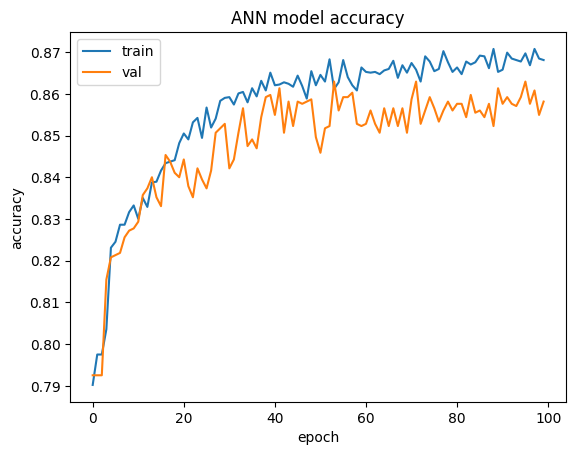

In [39]:
ann_classifier.test_on_batch(xtest, ytest)
plt.plot(ann_model.history["accuracy"])
plt.plot(ann_model.history["val_accuracy"])
plt.title('ANN model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


At an epoch of ~65, the model has optimal accuracy

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
